## Import Things

In [79]:
import tensorflow as tf
from tensorflow.keras import layers, models,optimizers
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [80]:
tf.random.set_seed(42)

## Data Preparation

### Download Data Mnist

Disini kita akan mendownload data dari openml, sebenarnya kita juga bisa mendapatkan data mnist langsung menggunakan library keras, namun disini kita akan menggunakan openml untuk mendownload data mnist.

In [81]:
mnist = fetch_openml('mnist_784',parser='auto')
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


### Split Data Train dan Data Test

In [82]:
data, labels = mnist.data.to_numpy(), mnist.target.astype(int)
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.3, random_state=42)
train_data = train_data.astype("float32") / 255.0
test_data = test_data.astype("float32") / 255.0
train_data = train_data.reshape(train_data.shape[0], 28, 28)
test_data = test_data.reshape(test_data.shape[0], 28, 28)

### Feature Extraction

In [83]:
unique_labels = np.unique(test_labels)
print(unique_labels)

[0 1 2 3 4 5 6 7 8 9]


## Build Model

### Convolutional Layer

Disini kita menggunakan `3` layer convolusional dengan masing masing memiliki filter `28`, `64`, dan `128` dengan ukuran `4x4`. Pada setiap layer akan dilakukan max pooling dnegan ukuran `2x2`.

In [84]:
model = models.Sequential()
model.add(layers.Conv2D(28, (4, 4),activation='relu',input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (4, 4),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4),activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

In [85]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 25, 25, 28)        476       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 64)        28736     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 6, 6, 128)         131200    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 128)      

### Fully Connected Layer

Disini kita menggunakan 2 layer yang pertama berukuran `128` dan yang kedua untuk output berukuran `10`.

In [86]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
# model.add(layers.Dropout(0.4))
model.add(layers.Dense(len(unique_labels)))

In [87]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 25, 25, 28)        476       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 28)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 12, 12, 64)        28736     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 6, 6, 128)         131200    
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 3, 3, 128)      

### Compile Model

Kita mengcompile model menggunakan optimizer `Adam` dengan loss `SparseCategoricalCrossentropy` dan metrics `accuracy`.

In [88]:
model.compile(optimizer='Adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Train Model

Disini kita akan mentraining model dengan epoch `10`.

In [89]:
history = model.fit(train_data, train_labels, epochs=10,
                    validation_data=(test_data, test_labels))

Epoch 1/10
1532/1532 [==============================] - 9s 5ms/step - loss: 0.1318 - accuracy: 0.9586 - val_loss: 0.0546 - val_accuracy: 0.9832
Epoch 2/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 0.0478 - val_accuracy: 0.9843
Epoch 3/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0439 - val_accuracy: 0.9862
Epoch 4/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0389 - val_accuracy: 0.9882
Epoch 5/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0296 - val_accuracy: 0.9920
Epoch 6/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0340 - val_accuracy: 0.9911
Epoch 7/10
1532/1532 [==============================] - 7s 5ms/step - loss: 0.0116 - accuracy: 0.9964 - val_loss: 0.0326 - val_accuracy:

## Test Model

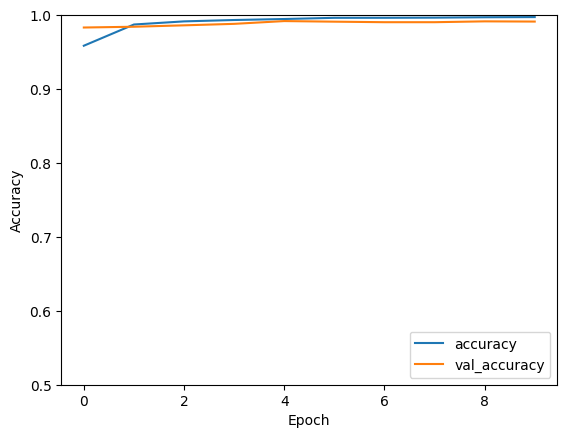

In [90]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [92]:
test_loss, test_acc = model.evaluate(test_data,  test_labels, verbose=2)
print(test_acc)

657/657 - 1s - loss: 0.0364 - accuracy: 0.9913 - 1s/epoch - 2ms/step
0.9912857413291931


Hasil dari training diatas mendapatkan akurasi `0.9973` pada data train dan `0.9913` pada data test hanya dengan 10 epoch saja.